In [2]:
import pandas as pd
import numpy as np

import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
crypto = input("Enter the code of crypto: ")
data = yf.download(crypto, "2008-01-01", "2022-01-01", auto_adjust = True)
data.head()

Enter the code of crypto: ETH-USD
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


In [5]:
data.shape

(1514, 5)

In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03
mean,921.227919,954.071439,884.668193,923.175039,1.231976e+10
std,1176.283832,1216.149296,1131.144983,1177.667120,1.146376e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,188.990917,194.329247,184.756275,189.240353,2.888513e+09
50%,360.173828,371.713989,351.629303,360.169434,8.896970e+09
75%,1050.762451,1126.990021,992.614624,1052.662445,1.791995e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


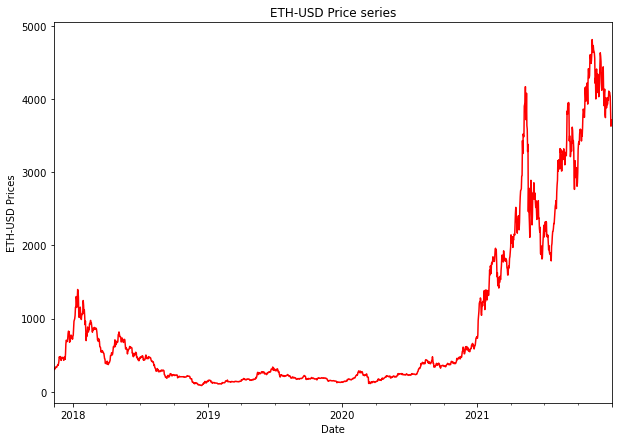

In [11]:
data.Close.plot(figsize=(10, 7), color="r")
plt.ylabel("{} Prices".format(crypto))
plt.title("{} Price series".format(crypto))
plt.show()

In [14]:
x = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1211, 4)
(303, 4)
(1211,)
(303,)


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
predition_1 = lr.predict(X_test)

In [16]:
predition_1

array([ 346.44927438, 4084.07256545, 1044.64093754,  275.89400636,
        298.28859161, 3440.4023017 ,  201.9433232 ,  341.89850704,
        765.73440818,  699.84151942,  392.77511136,  612.013394  ,
        162.61603943,  227.05954253, 3827.68869109,  215.4082237 ,
        135.4430721 ,  138.81802399,  137.72728544, 2718.22780987,
        201.03554548,  168.01868874,  243.44909856,  405.44545117,
        892.20601033,  171.32385091,  165.35294404,  168.75770883,
        134.81328686,  191.09483025,  393.39162067, 1570.7332278 ,
        116.66503649,  390.10200101, 3893.37936628,  222.33335381,
       1319.89441464,  210.35452412, 2842.95633704,  238.11646273,
        163.5858205 ,  174.82705523,  133.49470197, 1812.46231922,
        104.32736723,  214.66112593,  136.97813734,  173.35916812,
        241.52147274,  309.40306946, 2070.9516136 ,  121.23223279,
        155.99684322, 2357.91123644,  172.58321887, 4180.61294266,
        407.61065821,  161.55587296,  278.6566299 ,  412.47090

In [19]:
# MSE
# RMSE
# R^2 - squared

from sklearn.metrics import mean_absolute_error, r2_score

def calc_metric(y_test, y_pred):
    mse = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scor = r2_score(y_test, y_pred)
    
    print(mse)
    print(rmse)
    print(r2_scor)

calc_metric(Y_test, predition_1)

12.92179985967756
3.5946905095818136
0.9994394435304192
